In [2]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

save_dir = '/home/kasatkin/Desktop/Pseudo_Lidar_V2/results/MOTS/ESGM/depth_maps/'
disp_folder = '/home/kasatkin/ros_workspaces/esgm_ws/disparity_images/'
depth_maps_examples = '/home/kasatkin/Desktop/Pseudo_Lidar_V2/results/MOTS/depth_maps_corrected/'

In [2]:
!nvidia-smi

Tue Jul  7 15:39:42 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.100      Driver Version: 440.100      CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:01:00.0 Off |                    0 |
| N/A   44C    P0   169W / 300W |  17640MiB / 32510MiB |      3%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-SXM2...  Off  | 00000000:02:00.0 Off |                    0 |
| N/A   31C    P0    53W / 300W |   9840MiB / 32510MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [3]:
def transform(array):
    """array is numpy array"""
    assert len(array.shape) == 2
    arr = array.copy().astype(np.float32)
    # arr = array.copy()
    
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            if arr[i, j] == 65535. or arr[i, j] == 0.:
                arr[i, j] = -1.
            else:
                arr[i, j] = 0.54 * 721 / (arr[i, j]) 
            
    return arr


def plot_dm(image):
    fig, ax = plt.subplots()

    ax.imshow(image)

    fig.set_figwidth(15)    #  ширина и
    fig.set_figheight(15)    #  высота "Figure"

    plt.show()

# ESGM DISPARITY

In [7]:
%%time

for filename in sorted(os.listdir(disp_folder)):
    img = np.array(Image.open(os.path.join(disp_folder, filename)), dtype=np.uint32)
    img = transform(img)
    np.save(os.path.join(save_dir, filename[:-4]), img, allow_pickle=True, fix_imports=True)

KeyboardInterrupt: 

In [41]:
img = np.array(Image.open(os.path.join(disp_folder, sorted(os.listdir(disp_folder))[0])), dtype=np.uint32)

In [42]:
print(img.reshape(-1, 1).min(), img.reshape(-1, 1).max())
print(sorted(list(np.unique(img.reshape(-1, 1))))[:10])
img

0 65535
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


array([[65535, 65535, 65535, ...,   731,   724,   723],
       [65535, 65535, 65535, ...,   736,   725,   725],
       [65535, 65535, 65535, ...,   735,   724,   724],
       ...,
       [65535, 65535, 65535, ...,  2048,  2046,  2043],
       [65535, 65535, 65535, ...,  2047,  2046,  2043],
       [65535, 65535, 65535, ...,  2047,  2044,  2043]], dtype=uint32)

In [43]:
print(transform(img).reshape(-1, 1).min(), transform(img).reshape(-1, 1).max())
transform(img)

-1.0 389.34


array([[-1.        , -1.        , -1.        , ...,  0.53261286,
         0.5377624 ,  0.5385062 ],
       [-1.        , -1.        , -1.        , ...,  0.52899456,
         0.5370207 ,  0.5370207 ],
       [-1.        , -1.        , -1.        , ...,  0.5297143 ,
         0.5377624 ,  0.5377624 ],
       ...,
       [-1.        , -1.        , -1.        , ...,  0.19010742,
         0.19029325,  0.1905727 ],
       [-1.        , -1.        , -1.        , ...,  0.1902003 ,
         0.19029325,  0.1905727 ],
       [-1.        , -1.        , -1.        , ...,  0.1902003 ,
         0.19047946,  0.1905727 ]], dtype=float32)

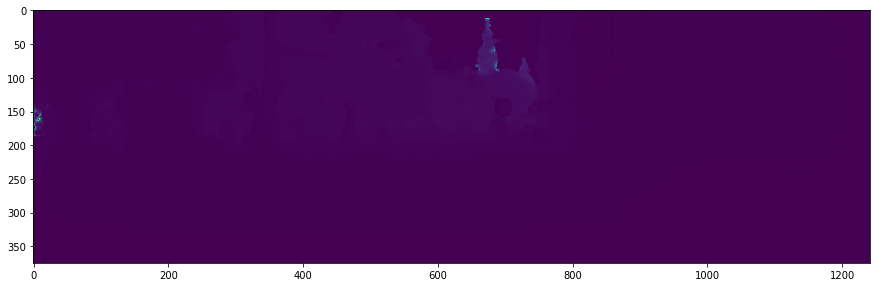

In [44]:
plot_dm(transform(img))

In [ ]:
sample_img = '/home/kasatkin/Desktop/Images/s600.jpg'

sample_img = np.array(Image.open(sample_img), dtype=np.uint16)
# print(sample_img)
plot_dm(sample_img)

# ESGM DEPTH MAPS

In [8]:
ESGM_dir = '/home/kasatkin/ros_workspaces/esgm_ws/depth_maps/'
img = np.array(Image.open(os.path.join(ESGM_dir, sorted(os.listdir(ESGM_dir))[0])), dtype=np.uint32)
print(img.reshape(1, -1).min(), img.reshape(1, -1).max())
img[365:375, 100:110]

0 255


array([[6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 0, 0, 0, 6],
       [6, 6, 6, 6, 0, 0, 0, 0, 0, 6],
       [6, 6, 6, 0, 0, 0, 0, 6, 6, 6],
       [0, 0, 0, 0, 6, 6, 6, 6, 6, 6],
       [0, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [0, 6, 6, 6, 6, 6, 6, 6, 6, 6]], dtype=uint32)

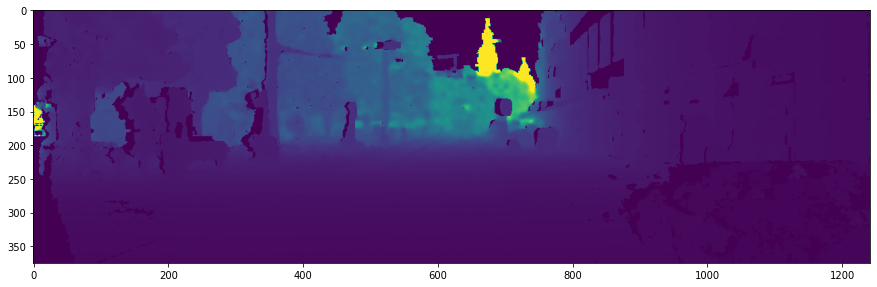

In [5]:
plot_dm(img)

In [6]:
%%time

for filename in sorted(os.listdir(ESGM_dir)):
    img = np.array(Image.open(os.path.join(ESGM_dir, filename)), dtype=np.uint32)
    np.save(os.path.join(save_dir, filename[:-4]), img, allow_pickle=True, fix_imports=True)

CPU times: user 941 ms, sys: 658 ms, total: 1.6 s
Wall time: 1.6 s


# PL++ DEPTH MAPS

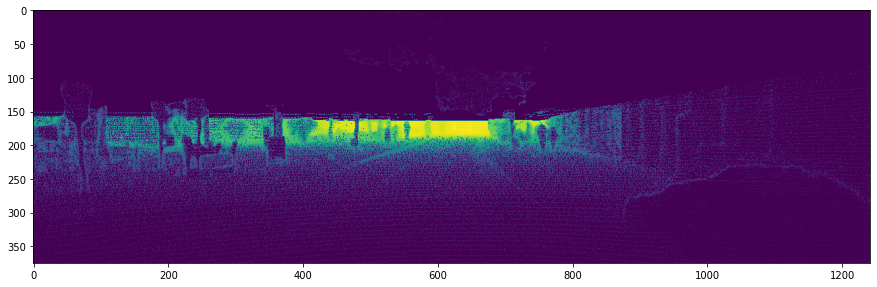

In [135]:
depth_maps_dir = '/home/kasatkin/Desktop/Pseudo_Lidar_V2/results/MOTS/depth_maps_corrected/'

img = np.load(os.path.join(depth_maps_dir, sorted(os.listdir(depth_maps_dir))[0]))
plot_dm(img)

In [136]:
img

array([[-1.       , -1.       , -1.       , ..., -1.       , -1.       ,
        -1.       ],
       [-1.       , -1.       , -1.       , ..., -1.       , -1.       ,
        -1.       ],
       [-1.       , -1.       , -1.       , ..., -1.       , -1.       ,
        -1.       ],
       ...,
       [-1.       , -1.       , -1.       , ..., -1.       ,  3.371825 ,
        -1.       ],
       [ 5.8905406, -1.       , -1.       , ..., -1.       , -1.       ,
        -1.       ],
       [-1.       , -1.       , -1.       , ..., -1.       , -1.       ,
         3.2938604]], dtype=float32)

In [137]:
print(img.reshape(1, -1).min(), img.reshape(1, -1).max())

-1.0 79.976326


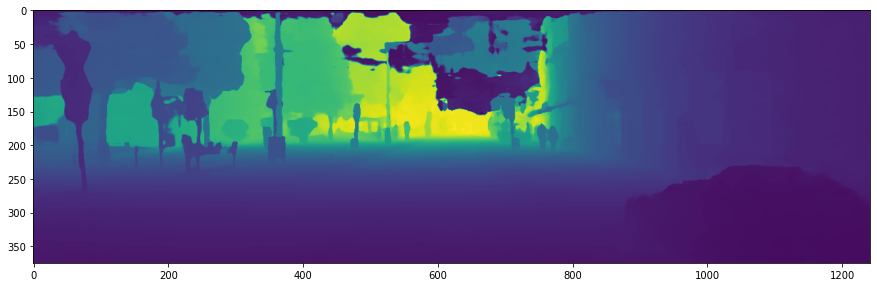

In [27]:
depth_maps_dir_2 = '/home/kasatkin/Desktop/Pseudo_Lidar_V2/results/MOTS/depth_maps/trainval'

img_2 = np.load(os.path.join(depth_maps_dir_2, sorted(os.listdir(depth_maps_dir_2))[0]))
plot_dm(img_2)

In [6]:
img

array([[-1.       , -1.       , -1.       , ..., -1.       , -1.       ,
        -1.       ],
       [-1.       , -1.       , -1.       , ..., -1.       , -1.       ,
        -1.       ],
       [-1.       , -1.       , -1.       , ..., -1.       , -1.       ,
        -1.       ],
       ...,
       [-1.       , -1.       , -1.       , ..., -1.       ,  3.371825 ,
        -1.       ],
       [ 5.8905406, -1.       , -1.       , ..., -1.       , -1.       ,
        -1.       ],
       [-1.       , -1.       , -1.       , ..., -1.       , -1.       ,
         3.2938604]], dtype=float32)